In [14]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Junction,Speed Limit,Road Width,Types of Signs,Pavement Edge Lines,Road Pattern,Cross Roads,Risk
0,1,1,2,0,0,0,0,2
1,2,0,2,2,0,5,2,2
2,3,0,1,0,0,1,0,1
3,4,1,2,1,1,4,1,0
4,5,1,1,3,0,3,1,0


In [3]:
dataset = data.values
X = dataset[:,0:7]
Y = dataset[:,7:8]

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(140, 7) (30, 7) (30, 7) (140, 1) (30, 1) (30, 1)


In [9]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [10]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
5/5 [==============================] - 0s 21ms/step - loss: 0.1008 - accuracy: 0.3071 - val_loss: 0.0383 - val_accuracy: 0.4667
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1002 - accuracy: 0.3071 - val_loss: 0.0418 - val_accuracy: 0.4667
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0960 - accuracy: 0.3071 - val_loss: 0.0403 - val_accuracy: 0.4667
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0942 - accuracy: 0.3071 - val_loss: 0.0370 - val_accuracy: 0.4667
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0950 - accuracy: 0.3071 - val_loss: 0.0363 - val_accuracy: 0.4667
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0905 - accuracy: 0.3071 - val_loss: 0.0379 - val_accuracy: 0.4667
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0906 - accuracy: 0.3071 - val_loss: 0.0366 - val_accuracy: 0.4667
Epoch 8/100
5/5 [===

In [15]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 23ms/step - loss: 0.0408 - accuracy: 0.3667


0.36666667461395264

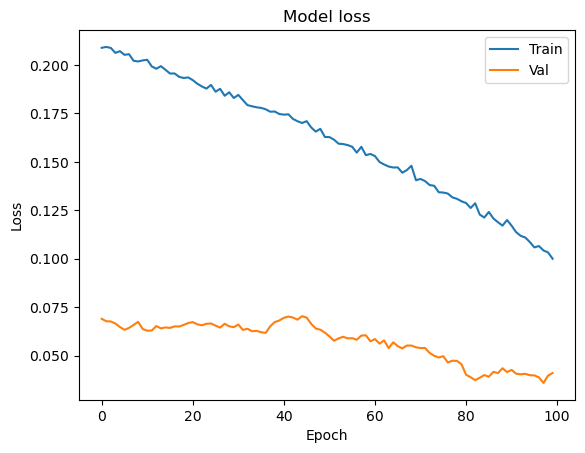

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

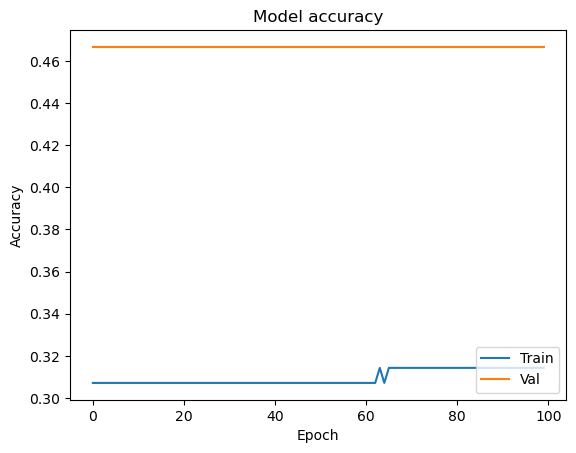

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()